In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.preprocessing import LabelEncoder
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = df[features]
y = df.Species

In [5]:
print(x.isnull().any())
print()
print(y.isnull().any())

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
dtype: bool

False


In [6]:
labelencoder = LabelEncoder()
labeled_y = labelencoder.fit_transform(y)

In [7]:
print(labeled_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
def draw(dt_model, x, features):
    dot_data = StringIO()
    export_graphviz(dt_model, out_file = dot_data, feature_names = features, filled = True, rounded = True, special_characters = True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

def model(x, y, features, max_leaf_nodes = None):
    dt_model = DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes, random_state = 1)
    trained_dt_model = dt_model.fit(x, y)
    return draw(dt_model, x, features)

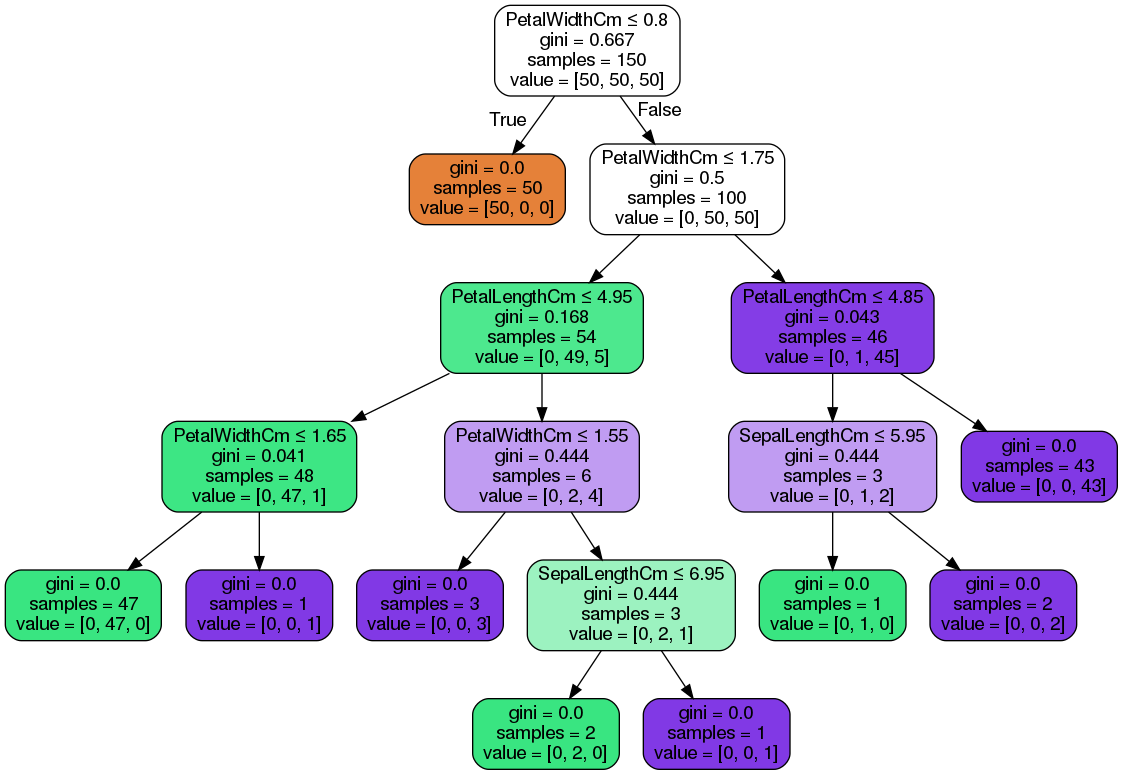

In [9]:
graph = model(x, y, features)
Image(graph.create_png())

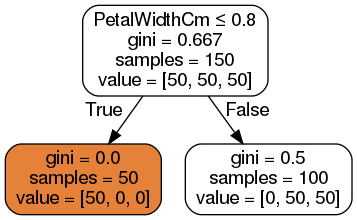

***************************


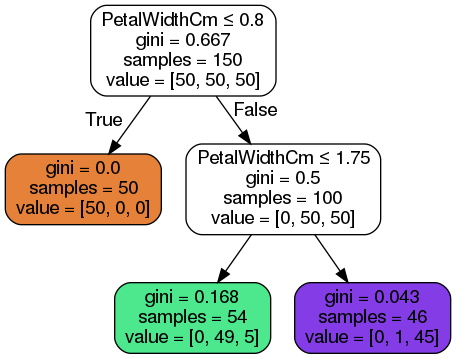

***************************


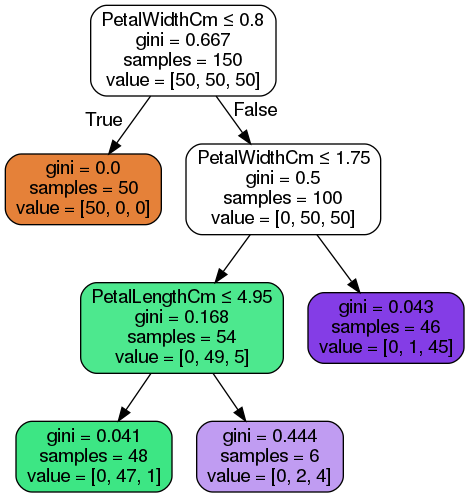

***************************


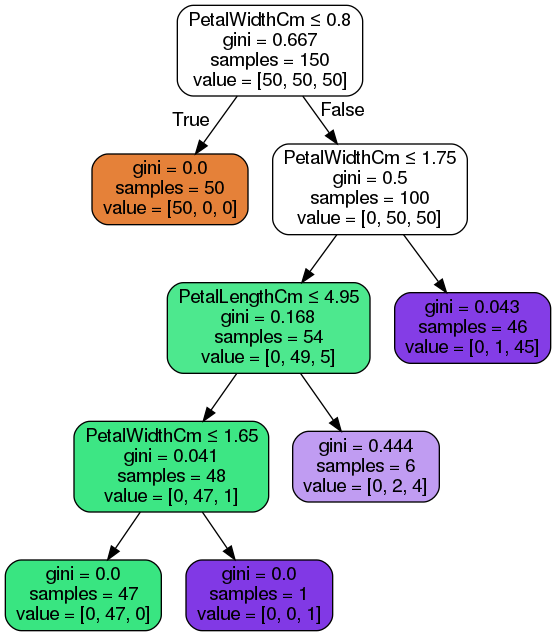

***************************


In [10]:
for i in [2, 3, 4, 5]:
    dt_model = (model(x, y, features, max_leaf_nodes = i))
    Image(dt_model.create_png())
    print('***************************')